In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("NordpoolMarket.csv",sep=";")
df.head()

,HourUTC,HourDK,PriceArea,SpotPurchase,SpotSale,SpotPriceDKK,ElbasAveragePriceDKK,ElbasMaxPriceDKK,ElbasMinPriceDKK,SpotPriceEUR,ElbasAveragePriceEUR,ElbasMaxPriceEUR,ElbasMinPriceEUR
0,2021-04-30 21:00,2021-04-30 23:00,DK1,"0,000000","0,000000","512,020020",NaN,NaN,NaN,"68,860001",NaN,NaN,NaN
1,2021-04-30 21:00,2021-04-30 23:00,DK2,"776,000000","0,000000","512,020020",NaN,NaN,NaN,"68,860001",NaN,NaN,NaN
2,2021-04-30 20:00,2021-04-30 22:00,DK1,"0,000000","0,000000","559,390015","472,706512","488,470825","456,496033","75,230003","63,570000","65,690002","61,389999"
3,2021-04-30 20:00,2021-04-30 22:00,DK2,"762,000000","0,000000","559,390015","484,009247","489,214447","479,398926","75,230003","65,089996","65,790001","64,470001"
4,2021-04-30 19:00,2021-04-30 21:00,DK1,"0,000000","0,000000","585,260010","542,604919","557,105103","526,022644","78,709999","72,970001","74,919998","70,739998"


In [21]:
df.columns

Index(['HourUTC', 'HourDK', 'PriceArea', 'SpotPurchase', 'SpotSale',
       'SpotPriceDKK', 'ElbasAveragePriceDKK', 'ElbasMaxPriceDKK',
       'ElbasMinPriceDKK', 'SpotPriceEUR', 'ElbasAveragePriceEUR',
       'ElbasMaxPriceEUR', 'ElbasMinPriceEUR'],
      dtype='object')

In [22]:
df['HourUTC']=pd.to_datetime(df['HourUTC'])

In [23]:
df.isnull().sum()

HourUTC                     0
HourDK                      0
PriceArea                   0
SpotPurchase                0
SpotSale                    0
SpotPriceDKK                0
ElbasAveragePriceDKK    10956
ElbasMaxPriceDKK        10956
ElbasMinPriceDKK        10956
SpotPriceEUR                0
ElbasAveragePriceEUR    10956
ElbasMaxPriceEUR        10956
ElbasMinPriceEUR        10956
dtype: int64

In [24]:
df= df[df['PriceArea'] == 'DK1']

In [25]:
df = df.sort_values('HourUTC')


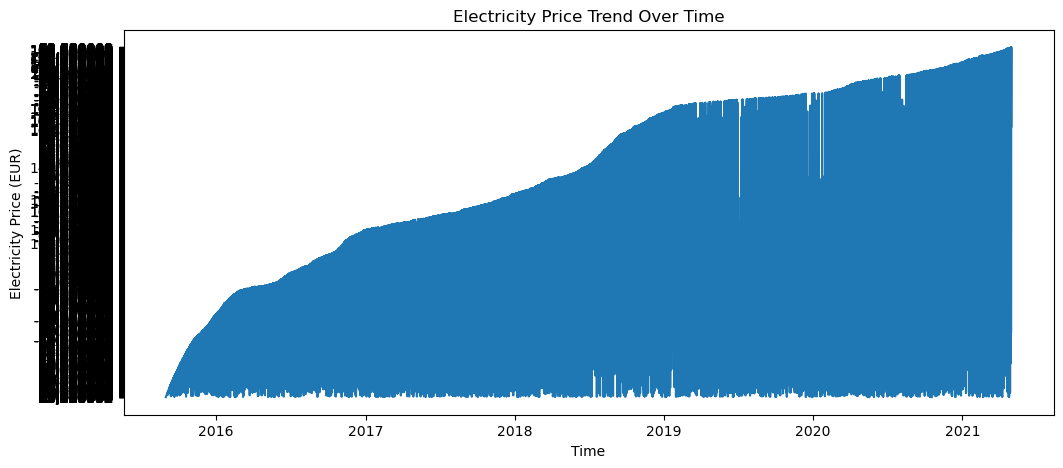

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['HourUTC'], df['SpotPriceEUR'])
plt.xlabel("Time")
plt.ylabel("Electricity Price (EUR)")
plt.title("Electricity Price Trend Over Time")
plt.show()

In [27]:
df[['HourUTC', 'SpotPriceEUR']].head()
df[['HourUTC', 'SpotPriceEUR']].dtypes

HourUTC         datetime64[ns]
SpotPriceEUR            object
dtype: object

In [28]:
# Sort data by time
df = df.sort_values('HourUTC')

#Create a simple time index
df['TimeIndex'] = range(len(df))

df[['TimeIndex','SpotPriceEUR']].head()

,TimeIndex,SpotPriceEUR
99352,0,"18,910000"
99350,1,"18,370001"
99348,2,"18,150000"
99346,3,"18,270000"
99344,4,"18,620001"


In [29]:
x = df[['TimeIndex']]
y = df['SpotPriceEUR']

split_index = int(len(df) * 0.8)

x_train = x.iloc[:split_index]
x_test = x.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [30]:
# Fix European Decimal format permanently
df['SpotPriceEUR'] = (
    df['SpotPriceEUR']
    .astype(str)
    .str.replace(',' , '.', regex=False)
)
df['SpotPriceEUR'] = pd.to_numeric(df['SpotPriceEUR'], errors='coerce')

In [31]:
df['SpotPriceEUR'].dtype

dtype('float64')

In [32]:
# Sort by time
df = df.sort_values('HourUTC')

#Create numeric time feature
df['TimeIndex'] = range(len(df))

x = df[['TimeIndex']]
y = df['SpotPriceEUR']

split_index = int(len(df) * 0.8)

x_train = x.iloc[:split_index]
x_test = x.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(x_test)
y_pred[:10]

array([42.12062753, 42.12106792, 42.12150831, 42.1219487 , 42.12238909,
       42.12282948, 42.12326987, 42.12371026, 42.12415065, 42.12459104])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 19.16835455079052
RMSE: 23.922502930964587


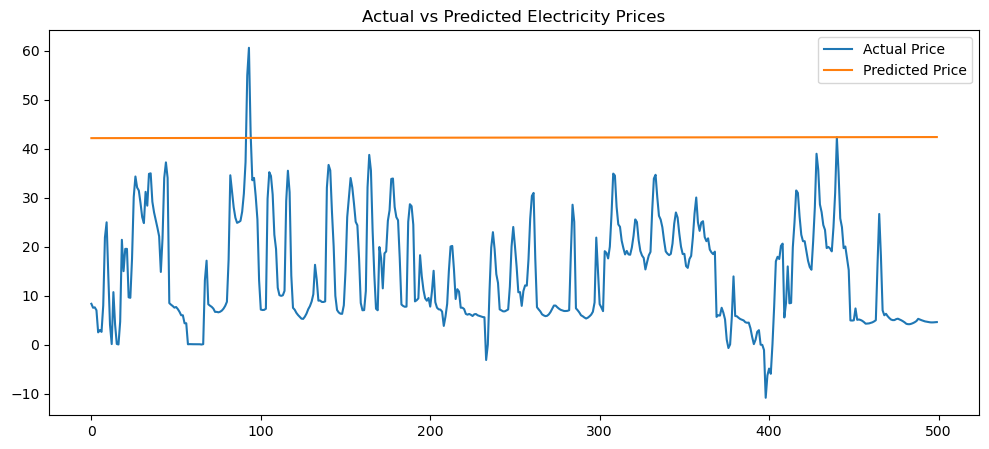

In [36]:
import matplotlib.pyplot as plt

plt.figure (figsize=(12,5))
plt.plot(y_test.values[:500], label="Actual Price")
plt.plot (y_pred[:500], label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Electricity Prices")
plt.show()

## Model / System Design
A Linear Regression model was used to predict electricity prices.
The model uses time index as the feature to learn long-term trends in the data.
This approach provides a simple and  baseline model.

## Evaluation and Analysis
The model performance was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error(RMSE).
The results show that the model captures overall price trends but struggles with sudden spikes in electricity prices.

## Ethical Considerations and Responsible AI
The dataset used is publicly available and does not contain personal data.
Predictions should be used responsibly and not as the sole basis for financial or policy decisions.

## Conclusions and Future Scope
This Project demonstrates the application of AI for electricity market trend analysis and price prediction.
Future improvements may include advanced time-series models such as LSTM and the inclusion of external factors like weather data.